<a href="https://colab.research.google.com/github/rsonar821/Regression-Capstone-Project/blob/main/Seoul_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date: Date on which bike was rented (Format: year-month-day)
* ### Rented Bike Count: Count of bikes rented at each hour
* ### Hour: Hour of the day
* ### Temperature: Temperature of the hour in Celsius
* ### Humidity: Humidity% of the hour
* ### Windspeed: Windspeed of the hour in m/s
* ### Visibility: Visibility of the hour in units of 10m
* ### Dew Point Temperature: Dew Point Temperature of the hour in Celsius
* ### Solar Radiation: Solar Radiation of the hour in MJ/m2
* ### Rainfall: Rainfall of the hour in mm
* ### Snowfall: Snowfall of the hour in cm
* ### Seasons: 4 seasons (Winter, Spring, Summer and Autumn)
* ### Holiday: Whether the day is a Holiday or a Working Day
* ### Functional Day: Whether the day is functional for renting bikes or not.

In [59]:
# Importing Basic Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Importing Libraries for Data Processing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RandomizedSearchCV

# Importing Model Evaluation Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [60]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
# Loading the dataset

df = pd.read_csv("/content/drive/MyDrive/SeoulBikeData.csv", encoding= 'unicode_escape')

## **Analyzing and understanding the dataset**

In [62]:
# Printing the first 5 rows

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [63]:
# Printing the last 5 rows

df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [64]:
# Checking the shape of the dataset

print('Shape of the dataset:',end='')
df.shape

Shape of the dataset:

(8760, 14)

In [65]:
# Checking the names of all the columns of the dataset

df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [66]:
# Checking the basic information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [67]:
# Checking null values in the dataset

df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

No null values in the dataset

In [68]:
# Statistical description of the dataset

df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [69]:
# Checking the unique values of the 'Seasons' column

df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [70]:
# Checking the unique values of the 'Holiday' column

df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [71]:
# Checking the unique values of the 'Functioning Day' column

df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

## **Data Preprocessing**

In [72]:
# Checking the shape of the dataset where rented bike count is equal to 0

df[df['Rented Bike Count']==0].shape

(295, 14)

In [73]:
# Checking the shape of the dataset where the renting bike store was not functional

df[df['Functioning Day']=='No'].shape

(295, 14)

The hours in which 0 bikes have been rented were the hours where the bike rental store was not functional and it is quite obvious that no bikes would be rented if the store is closed for that hour

In [74]:
# Updating the dataframe where the bike rental count is not 0

df = df[df['Rented Bike Count']!=0]

In [75]:
# Checking the shape of the updated dataframe

print('Shape of the dataset:', end='')
df.shape

Shape of the dataset:

(8465, 14)

In [76]:
# Checking the basic information of the updated dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   object 
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature(°C)            8465 non-null   float64
 4   Humidity(%)                8465 non-null   int64  
 5   Wind speed (m/s)           8465 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature(°C)  8465 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8465 non-null   float64
 10  Snowfall (cm)              8465 non-null   float64
 11  Seasons                    8465 non-null   object 
 12  Holiday                    8465 non-null   object 
 13  Functioning Day            8465 non-null   objec

In [77]:
# Checking the statistical description of the updated dataframe

df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8465,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.00000,8465.000000,8465,8465,8465
unique,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,1
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8057,8465
mean,NaN,729.156999,11.507029,12.771057,58.147194,1.725883,1433.873479,3.944997,0.567868,0.14912,0.077685,NaN,NaN,NaN
std,NaN,642.351166,6.920899,12.104375,20.484839,1.034281,609.051229,13.242399,0.868245,1.12554,0.444063,NaN,NaN,NaN
min,NaN,2.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.00000,0.000000,NaN,NaN,NaN
25%,NaN,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.00000,0.000000,NaN,NaN,NaN
50%,NaN,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.00000,0.000000,NaN,NaN,NaN
75%,NaN,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.00000,0.000000,NaN,NaN,NaN


## Classifying the categorical and numerical data:

*   **Categorical:**

 1. Hour
 2. Seasons
 3. Holiday
 4. Functioning Day


*   **Numerical:**

 1. Rented Bike Count
 2. Temperature
 3. Humidity
 4. Windspeed
 5. Visibility
 6. Dew Point Temperature
 7. Solar Radiation
 8. Rainfall
 9. Snowfall

**Dependent Variable:**

Rented Bike Count

In [78]:
# Converting the 'Date' column to a date-time datatype

df['Date'] = pd.to_datetime(df['Date'])

In [79]:
# Extracting the year, months and days from the 'Date' column

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Day'] =df['Date'].dt.day_name()

## **Exploratory Data Analysis**

## **Categorical Variable Analysis**

### **Average number of bikes rented on the days of the week**

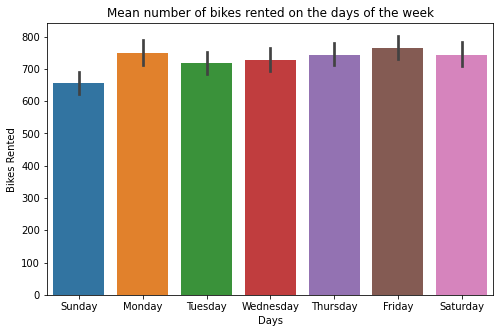

In [80]:
# Defining plot size
plt.figure(figsize=(8,5))

# Plotting a bargraph 
figure = sns.barplot(x=df['Day'], y=df['Rented Bike Count'], order=['Sunday', 'Monday',
                                                           'Tuesday', 'Wednesday',
                                                           'Thursday', 'Friday',
                                                           'Saturday'])

# Defining the title and x and y labels
figure.set(title='Mean number of bikes rented on the days of the week')
figure.set(xlabel='Days', ylabel='Bikes Rented')

# Displaying the graph
plt.show(figure)

Least numbers of bikes are being rented on Sundays, it shows people tend to rent the bikes for work and office purposes

### **Average number of bikes rented in different seasons**

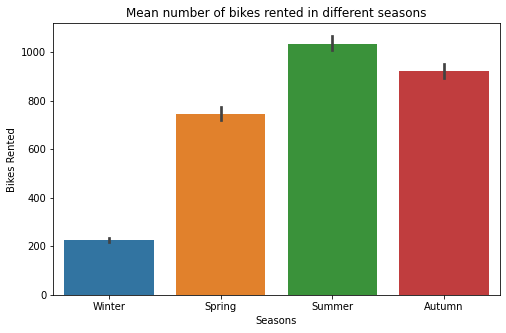

In [81]:
# Defining plot size
plt.figure(figsize=(8,5))

# Plotting a bargraph
figure = sns.barplot(x=df['Seasons'], y=df['Rented Bike Count'])

# Defining the title and x and y labels
figure.set(title='Mean number of bikes rented in different seasons')
figure.set(xlabel='Seasons', ylabel='Bikes Rented')

# Displaying the graph
plt.show(figure)

Maximum bikes are being rented in the Summer Season and least number of bikes are being rented in the Winter Season

### **Average number of bikes rented on holidays and working days**

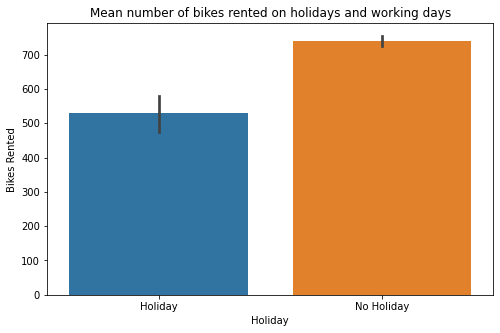

In [82]:
# Defining plot size
plt.figure(figsize=(8,5))

# Plotting a bargraph
figure = sns.barplot(x=df['Holiday'], y=df['Rented Bike Count'], order=['Holiday',
                                                                        'No Holiday'])

# Defining the title and x and y axis
figure.set(title='Mean number of bikes rented on holidays and working days')
figure.set(xlabel='Holiday', ylabel='Bikes Rented')

# Displaying the graph
plt.show(figure)

More number of bikes are being rented on the working days indicating that people rent bikes for work purposes more than leisure purposes

### **Average number of bikes rented in different years**

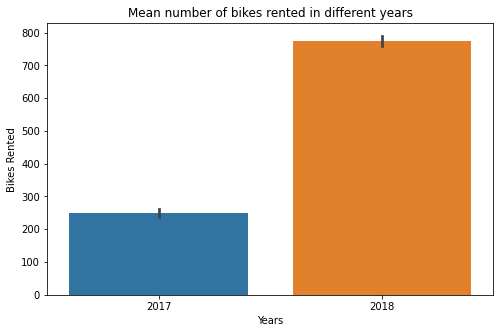

In [83]:
# Defining plot size
plt.figure(figsize=(8,5))

# Plotting a bargraph
figure = sns.barplot(x=df['Year'], y=df['Rented Bike Count'])

# Defining the title and x and y label
figure.set(title='Mean number of bikes rented in different years')
figure.set(xlabel='Years', ylabel='Bikes Rented')

# Displaying the graph
plt.show(figure)

The graph shows that the bike renting business is a growing business as the number of bikes rented in 2018 is more than the bikes rented in 2017

### **Average number of bikes rented in different months**

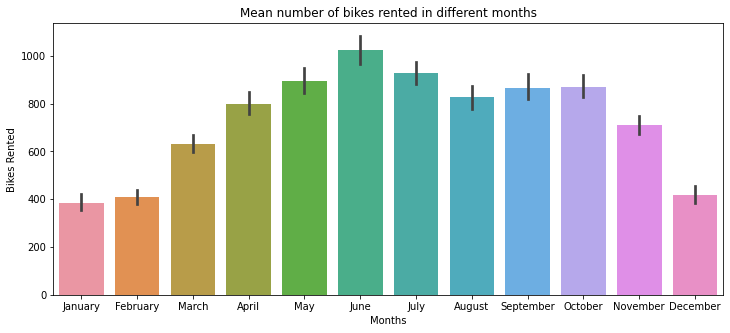

In [84]:
# Defining the plot size
plt.figure(figsize=(12,5))

# Plotting a bargraph
figure = sns.barplot(x=df['Month'], y=df['Rented Bike Count'])

# Defining the title and x and y labels
figure.set(title='Mean number of bikes rented in different months')
figure.set(xlabel='Months', ylabel='Bikes Rented')

# Displaying the graph
plt.show(figure)

Maximum number of bikes are getting rented in the month of May, June and July which are the summer months and it can be seen that people love riding the bikes in the summer season

### **Average number of bikes rented in different hours of the day**

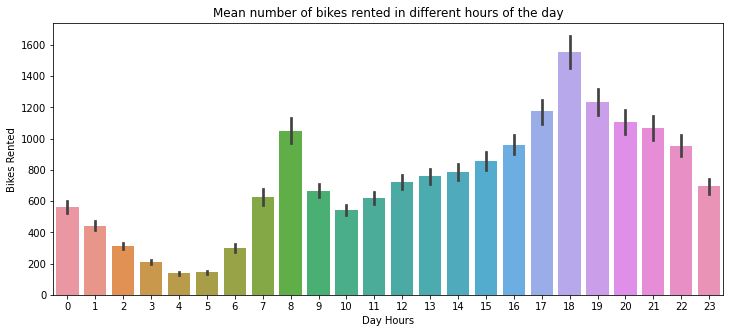

In [85]:
# Defining the plot size
plt.figure(figsize=(12,5))

# Plotting a bar graph
figure = sns.barplot(x=df['Hour'], y=df['Rented Bike Count'])

# Defining the title and x and y labels
figure.set(title='Mean number of bikes rented in different hours of the day')
figure.set(xlabel='Day Hours', ylabel='Bikes Rented')

# Displaying the graph
plt.show(figure)

Maximum number of bikes being rented in the evening time are at 5pm, 6pm and 7pm showing that people mostly rent bikes in the evening for leisure purposes after the office time.

Maximum number of bikes being rented in the morning time are at 8am showing that people rent bikes for going to office.

### **Correlation between all the variables**

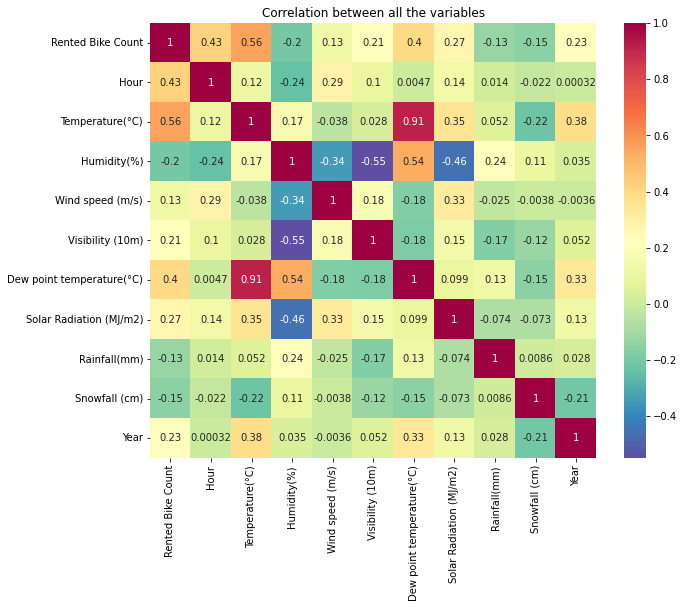

In [86]:
# Defining plot size
plt.figure(figsize=(10,8))

# Plotting a correlation heatmap
figure = sns.heatmap(df.corr(), annot=True, cmap='Spectral_r')

# Defining the title of the heatmap
figure.set(title='Correlation between all the variables')

# Displaying the heatmap
plt.show(figure)

Maximum collinearity between dependent and independent variable:
1. Temperature and Rented Bike Count
2. Hour and Rented Bike Count

Maximum collinearity between independent variables (Multi-Collinearity):
1. Temperature and Dew Point Temperature
2. Visibility and Humidity
3. Dew Point Temperature and Humidity
4. Solar Radiation and Humidity

## **Continuous Variable Analysis**

### **Effect of humidity on number of bikes rented**

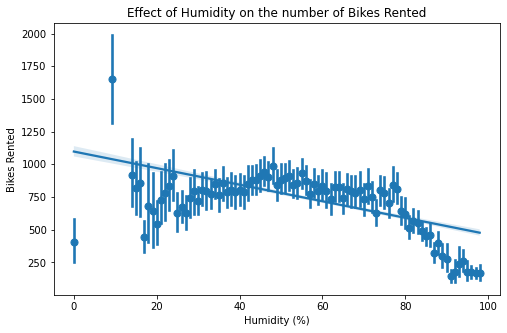

In [87]:
# Defining plot size
plt.figure(figsize=(8,5))

# Plotting a regression plot
figure = sns.regplot(x=df['Humidity(%)'], y=df['Rented Bike Count'], x_bins=1000, fit_reg=True)

# Defining the title and x and y labels
figure.set(title='Effect of Humidity on the number of Bikes Rented')
figure.set(xlabel='Humidity (%)', ylabel='Bikes Rented')

# Displaying the graph
plt.show(figure)

Number of bikes rented and Humidity shows a negative correlation

### **Effect of temperature on number of bikes rented**

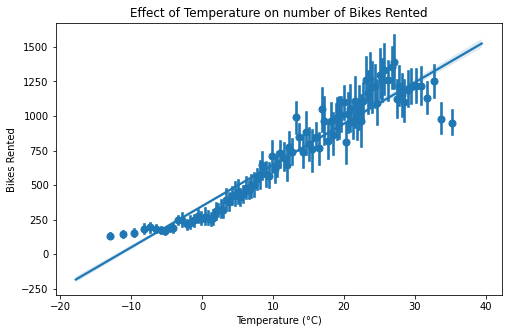

In [88]:
# Defining the plot size
plt.figure(figsize=(8,5))

# Plotting a regression plot
figure = sns.regplot(x=df['Temperature(°C)'], y=df['Rented Bike Count'], x_bins=100, fit_reg=True)

# Defining the title and x and y labels
figure.set(title='Effect of Temperature on number of Bikes Rented')
figure.set(xlabel='Temperature (°C)', ylabel='Bikes Rented')

# Displaying the graph
plt.show(figure)

Number of bikes rented and Temperature shows a positive correlation

### **Effect of wind speed on number of bikes rented**

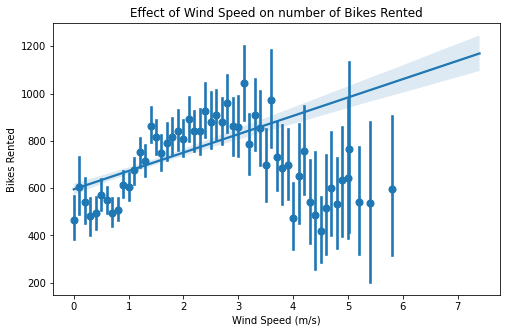

In [89]:
# Defining the plot size
plt.figure(figsize=(8,5))

# Plotting a regression plot
figure = sns.regplot(x=df['Wind speed (m/s)'], y=df['Rented Bike Count'], x_bins=1000, fit_reg=True)

# Defining the title and the x and y labels
figure.set(title='Effect of Wind Speed on number of Bikes Rented')
figure.set(xlabel='Wind Speed (m/s)', ylabel='Bikes Rented')

# Displaying the graph
plt.show(figure)

Number of bikes rented and Windspeed does not show a good correlation

### **Effect of visibilty on number of bikes rented**

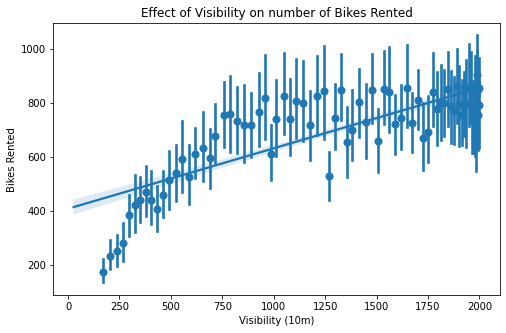

In [90]:
# Defining the plot size
plt.figure(figsize=(8,5))

# Plotting a regression plot
figure = sns.regplot(x=df['Visibility (10m)'], y=df['Rented Bike Count'], x_bins=100, fit_reg=True)

# Defining the title and x and y labels
figure.set(title='Effect of Visibility on number of Bikes Rented')
figure.set(xlabel='Visibility (10m)', ylabel='Bikes Rented')

# Displaying the graph
plt.show(figure)

Number of bikes rented and Visibilty shows a positive correlation

### **Effect of dew point temperature on number of bikes rented**

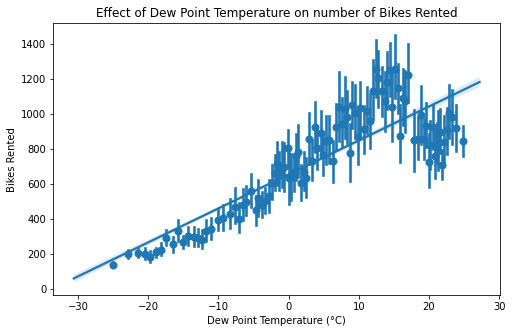

In [91]:
# Defining the plot size
plt.figure(figsize=(8,5))

# Plotting a regression plot
figure = sns.regplot(x=df['Dew point temperature(°C)'], y=df['Rented Bike Count'], x_bins=100, fit_reg=True)

# Defining the title and x and y labels
figure.set(title='Effect of Dew Point Temperature on number of Bikes Rented')
figure.set(xlabel='Dew Point Temperature (°C)', ylabel='Bikes Rented')

# Displaying the graph
plt.show(figure)

Number of bikes rented and Dew Point Temperature shows a positive correlation

### **Effect of solar radiation on number of bikes rented**

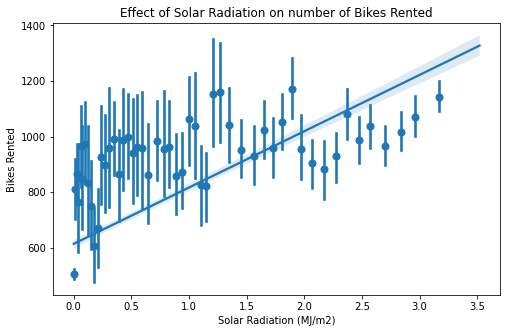

In [92]:
# Defining the plot size
plt.figure(figsize=(8,5))

# Plotting a regression plot
figure = sns.regplot(x=df['Solar Radiation (MJ/m2)'], y=df['Rented Bike Count'], x_bins=100, fit_reg=True)

# Defining the title and x and y labels
figure.set(title='Effect of Solar Radiation on number of Bikes Rented')
figure.set(xlabel='Solar Radiation (MJ/m2)', ylabel='Bikes Rented')

# Displaying the graph
plt.show(figure)

Number of bikes rented and Solar Radiation shows a positive correlation

### **Effect of rainfall on number of bikes rented**

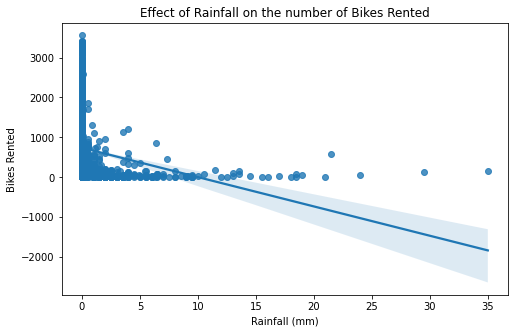

In [93]:
# Defining the plot size
plt.figure(figsize=(8,5))

# Plotting a regression plot
figure = sns.regplot(x=df['Rainfall(mm)'], y=df['Rented Bike Count'], fit_reg=True)

# Defining the title and x and y labels
figure.set(title='Effect of Rainfall on the number of Bikes Rented')
figure.set(xlabel='Rainfall (mm)', ylabel='Bikes Rented')

# Displaying the graph
plt.show(figure)

Number of bikes rented and Rainfall does not show a good correlation

### **Effect of snowfall on number of bikes rented**

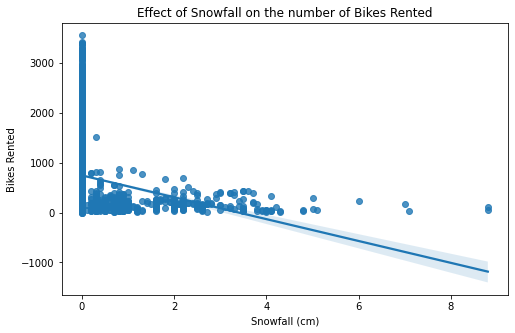

In [94]:
# Defining the plot size
plt.figure(figsize=(8,5))

# Plotting a regression plot
figure = sns.regplot(x=df['Snowfall (cm)'], y=df['Rented Bike Count'], fit_reg=True)

# Defining the title and x and y labels
figure.set(title='Effect of Snowfall on the number of Bikes Rented')
figure.set(xlabel='Snowfall (cm)', ylabel='Bikes Rented')

# Diplaying the graph
plt.show(figure)

Number of bikes rented and Snowfall does not show a good correlation

In [95]:
# Converting Snowfall and Rainfall to categorical variables

df['Snowfall (cm)'] = np.where(df['Snowfall (cm)']>df['Snowfall (cm)'].mean(), 1, 0)
df['Rainfall(mm)'] = np.where(df['Rainfall(mm)']>df['Rainfall(mm)'].mean(), 1, 0)

### **Average number of bikes rented in snowfall and no snowfall hour**

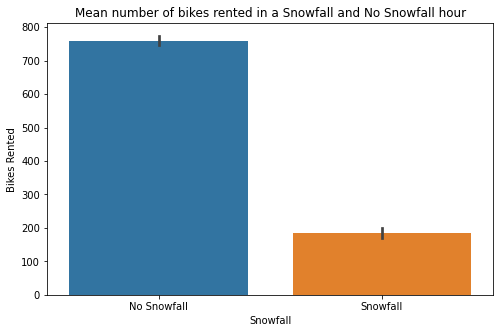

In [96]:
# Defining the plot size
plt.figure(figsize=(8,5))

# Plotting a bargraph
figure = sns.barplot(x=df['Snowfall (cm)'], y=df['Rented Bike Count'])

# Defining the title, xticks and x and y labels
figure.set(title='Mean number of bikes rented in a Snowfall and No Snowfall hour')
figure.set(xlabel='Snowfall', ylabel='Bikes Rented')
figure.set_xticklabels(['No Snowfall', 'Snowfall'])

# Displaying the graph
plt.show(figure)

Maximum number of bikes are rented in No Snowfall hour

### **Average number of bikes rented in rainfall and no rainfall hour**

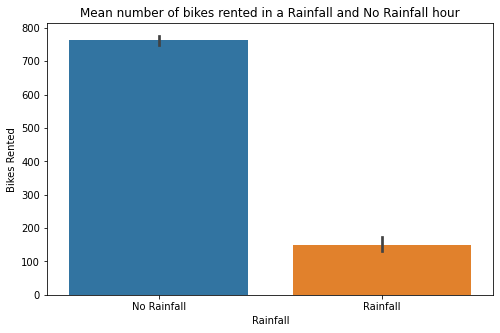

In [97]:
# Defining the plot size
plt.figure(figsize=(8,5))

# Plotting a bargraph
figure = sns.barplot(x=df['Rainfall(mm)'], y=df['Rented Bike Count'])

# Defining the title, xticks and x and y labels
figure.set(title='Mean number of bikes rented in a Rainfall and No Rainfall hour')
figure.set(xlabel='Rainfall', ylabel='Bikes Rented')
figure.set_xticklabels(['No Rainfall', 'Rainfall'])

# Displaying the graph
plt.show(figure)

Maximum number of bikes are rented in No Rainfall hour

### **Distribution of the number of bikes rented**

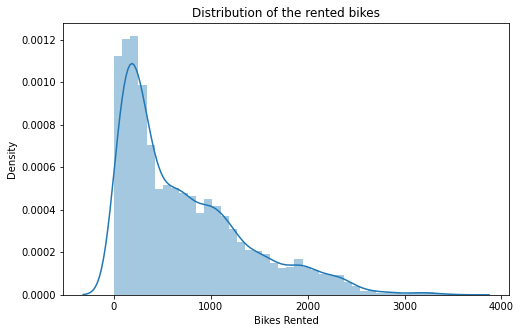

In [98]:
# Defining the plot size
plt.figure(figsize=(8,5))

# Plotting a distribution plot
figure = sns.distplot(df['Rented Bike Count'])

# Defining the title and x and y labels
figure.set(title='Distribution of the rented bikes')
figure.set(xlabel='Bikes Rented')

# Displaying the graph
plt.show(figure)

In [99]:
# Checking the skewness of the dependent variable

df['Rented Bike Count'].agg(['skew'])

skew    1.1397
Name: Rented Bike Count, dtype: float64

**Graph and Skewness**

**Fairly Symmetrical:** -0.5 to 0.5

**Moderate Skewed:** -0.5 to -1.0 and 0.5 to 1.0

**Highly Skewed:** < -1.0 and > 1.0

In [100]:
# Square Root Transformation of the dependent variable

df['Rented Bike Count'] = np.sqrt(df['Rented Bike Count'])

### **Distribution of the square root transformed rented bike count**

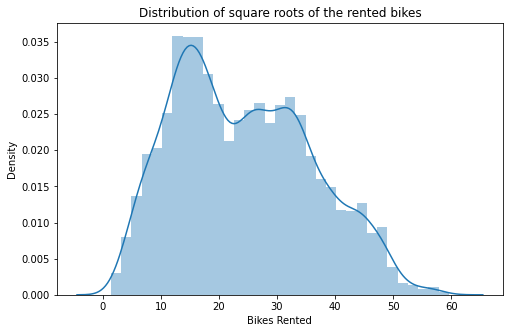

In [101]:
# Defining the plot size
plt.figure(figsize=(8,5))

# Plotting a distribution plot
figure = sns.distplot(df['Rented Bike Count'])

# Defining the title and x and y labels
figure.set(title='Distribution of square roots of the rented bikes')
figure.set(xlabel='Bikes Rented')

# Displaying the graph
plt.show(figure)

In [102]:
# Checking the skewness of the square root transformed dependent variable

df['Rented Bike Count'].agg(['skew'])

skew    0.346703
Name: Rented Bike Count, dtype: float64

Now the graph is normally distributed

### **Distribution plots of all the rest continuous independent variables**

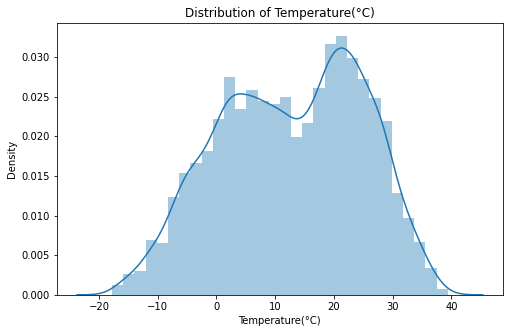

------------------------------------------------------------------------------------------------------------------------------------------------------


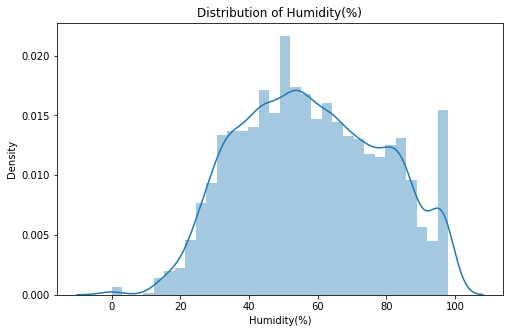

------------------------------------------------------------------------------------------------------------------------------------------------------


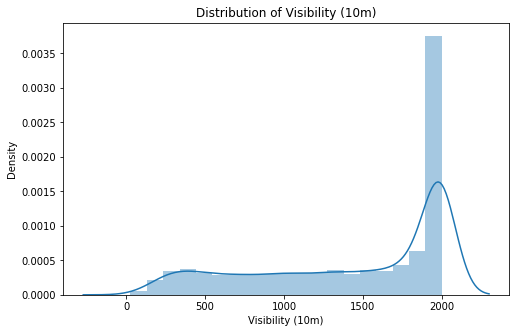

------------------------------------------------------------------------------------------------------------------------------------------------------


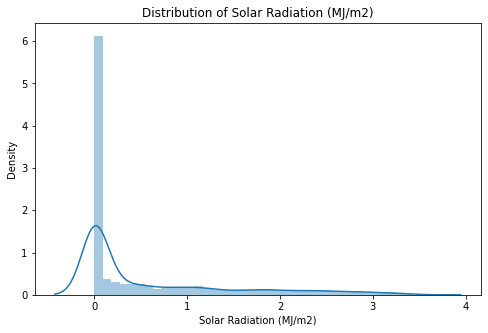

------------------------------------------------------------------------------------------------------------------------------------------------------


In [103]:
# Storing the continuous independent variables in a list
independent_variables = ['Temperature(°C)', 'Humidity(%)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)']

# Running a for loop to plot the distribution plot of all the continuous independent variables
for i in independent_variables:
  plt.figure(figsize=(8,5))
  figure = sns.distplot(df[i])
  figure.set(title=f'Distribution of {i}')
  figure.set(xlabel=i)
  plt.show(figure)
  print(('---')*50)

### **Boxplot of the dependent variable (Rented Bike Count)**

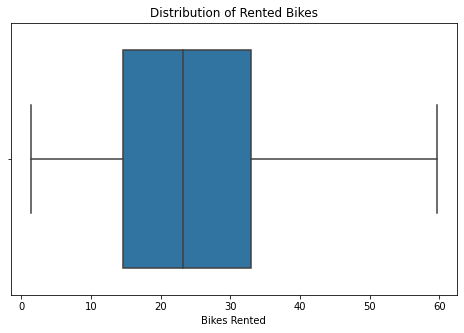

In [104]:
# Defining the plot size
plt.figure(figsize=(8,5))

# Plotting a boxplot
figure = sns.boxplot(df['Rented Bike Count'])

# Defining the title and x and y labels
figure.set(title='Distribution of Rented Bikes')
figure.set(xlabel='Bikes Rented')

# Displaying the graph
plt.show(figure)

The dependent variable is evenly distributed now after the square root transformation

### **Boxplots of the rest continuous independent variables**

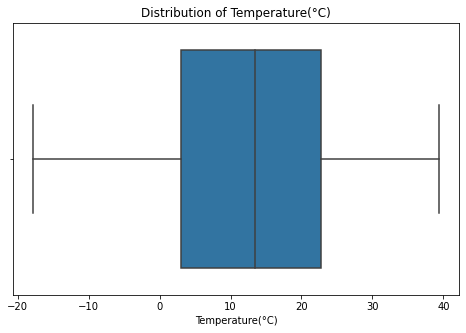

------------------------------------------------------------------------------------------------------------------------------------------------------


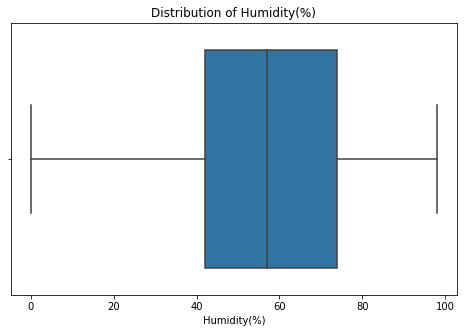

------------------------------------------------------------------------------------------------------------------------------------------------------


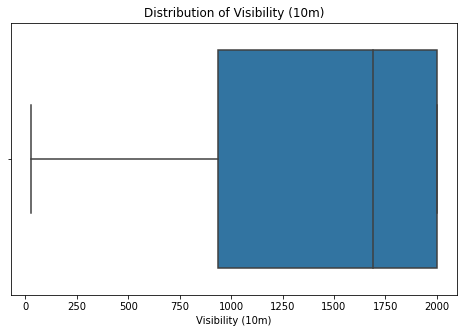

------------------------------------------------------------------------------------------------------------------------------------------------------


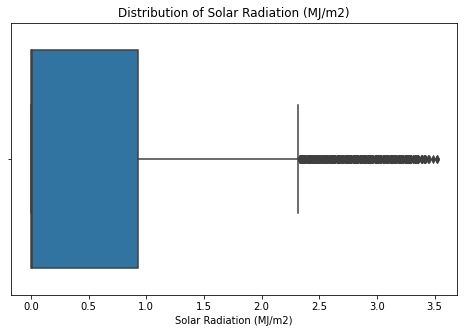

------------------------------------------------------------------------------------------------------------------------------------------------------


In [105]:
# Running a for loop to plot the boxplot of all the continuous independent variables
for i in independent_variables:
  plt.figure(figsize=(8,5))
  figure = sns.boxplot(df[i])
  figure.set(title=f'Distribution of {i}')
  figure.set(xlabel=i)
  plt.show(figure)
  print(('---')*50)

## **Data Preparation for Modelling**

In [106]:
# Converting the 'Month' and 'Day' columns to numerical values for modelling

df['Month'] = df['Date'].dt.month
df['Day'] =df['Date'].dt.weekday

In [107]:
# Creating numerical values from categorical columns 'Seasons', 'Holiday', and 'Year' for modelling

df = pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Year'], drop_first=True)

In [108]:
# Selecting the columns which are not required for the modelling
drop_cols = ['Date', 'Dew point temperature(°C)', 'Wind speed (m/s)', 'Functioning Day']

# Dropping the columns which are not required for modelling
df.drop(drop_cols, axis=1, inplace=True)

In [109]:
# Splitting the data into X and Y as independent and dependent variables respectively 

X = df.drop('Rented Bike Count', axis=1)
Y = df['Rented Bike Count']

In [110]:
# Splitting the dataset into 20:80 ratio as test and train data respectively

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [111]:
# Scaling the dataset for making all the values come in a common range

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [112]:
# Transforming the data in gaussian form for better results

power = PowerTransformer(method='yeo-johnson')
X_train = power.fit_transform(X_train)

## **Modelling:**

In [113]:
# Storing all the algorithms in a list

models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('SVR', SVR()))
models.append(('Decision Tree Regressor', DecisionTreeRegressor()))
models.append(('Random Forest Regressor', RandomForestRegressor()))
models.append(('Gradient Boosting', GradientBoostingRegressor()))
models.append(('XGB Regressor', XGBRegressor()))

In [114]:
# Calculating the 'r2' score for all the algorithms using cross validation

scores = {}
for name, model in models:
  score = np.mean(cross_val_score(model, X_train, Y_train, cv=10, scoring='r2'))
  scores[name] = score

[12:32:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:32:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:32:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:32:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:32:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:32:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:32:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:32:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [115]:
# Printing the 'r2' score of all the algorithms

print('R2 score of all the algorithms are:')
scores

R2 score of all the algorithms are:


{'Decision Tree Regressor': 0.8195733474953888,
 'Gradient Boosting': 0.8752114170098192,
 'Lasso': 0.6078468475290153,
 'Linear Regression': 0.6469629510423128,
 'Random Forest Regressor': 0.9064268629024514,
 'Ridge': 0.6469636348323571,
 'SVR': 0.7574736256282836,
 'XGB Regressor': 0.8754381208552722}

### **R2 Score of the algorithms**

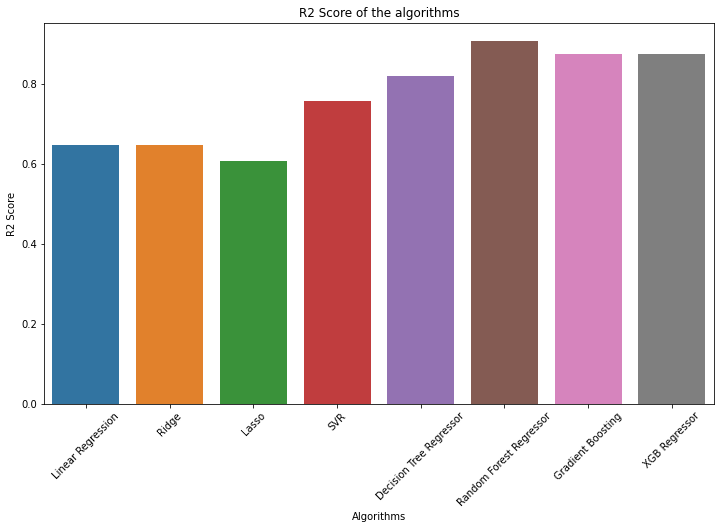

In [116]:
# Defining plot size
plt.figure(figsize=(12,7))

# Plotting a bargraph
figure = sns.barplot(x=list(scores.keys()),y=list(scores.values()))

# Defining the title, xticks rotation and x and y labels
plt.xticks(rotation=45)
figure.set(title='R2 Score of the algorithms')
figure.set(xlabel='Algorithms', ylabel='R2 Score')

# Displaying the graph
plt.show(figure)

### **Hyper-Parameter Tuning of Random Forest Regressor:**

In [117]:
# Initializing the Random Forest Regressor Model
model_rf = RandomForestRegressor(random_state = 42)

# Getting the parameters used by the Random Forest Regressor Model
print('Parameters currently in use:\n')
model_rf.get_params()

Parameters currently in use:



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [118]:
# Giving a range of values to the hyper-parameters to select the best from it

# Number of trees
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

# Minimum number of samples required to split a node
min_samples_split = range(2, 10)

# Minimum number of samples required at each leaf node
min_samples_leaf = range(2, 10)

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create a dictionary of all the hyper-parameters
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [119]:
# using Random Search CV to find the best parameters for the model
rf_random = RandomizedSearchCV(estimator=model_rf, param_distributions=random_grid, cv = 10, verbose=2, random_state=42, scoring='r2')

# Fitting the model with the training dataset
rf_random.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=200; total time=   4.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=200; total time=   4.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=200; total time=   4.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=200; total time=   4.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=200; total time=   4.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=200; total time=   4.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=200; total time=   4.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=200; total time= 

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'min_samples_leaf': range(2, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='r2', verbose=2)

In [120]:
# Getting the best parameters after the Random Search Cross Validation

rf_random.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'n_estimators': 400}

In [121]:
# Storing the best parameters in a variables
rf_best_parameters = rf_random.best_params_

# Using the best parameters to train the model
rf_model = RandomForestRegressor(bootstrap = rf_best_parameters['bootstrap'],
                                 max_depth = rf_best_parameters['max_depth'],
                                 min_samples_leaf = rf_best_parameters['min_samples_leaf'],
                                 min_samples_split = rf_best_parameters['min_samples_split'],
                                 n_estimators = rf_best_parameters['n_estimators'])

# Fitting the training data using the best parameters of the model
rf_model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=90, min_samples_leaf=2, min_samples_split=9,
                      n_estimators=400)

In [122]:
# Getting the training predictions
rf_train_preds = rf_model.predict(X_train)

#Getting the testing predictions
rf_test_preds = rf_model.predict(X_test)

In [123]:
# Defining a function for calculating adjusted R2 score

def adjusted_r2(n, k, actual, predicted):
  return 1 - (((n-1)/(n-k-1))*(1-r2_score(actual, predicted)))

In [124]:
# Defining a function to calculate the evaluation metrics of the model

def print_evaluation_metrics(actual_train, predicted_train, actual_test, predicted_test):
  print('Training Mean Squared Error is {}'.format(mean_squared_error(actual_train, predicted_train)))
  print('Testing Mean Squared Error is {}\n'.format(mean_squared_error(actual_test, predicted_test)))
  print('Training Root Mean Squared Error is {}'.format(math.sqrt(mean_squared_error(actual_train, predicted_train))))
  print('Testing Root Mean Squared Error is {}\n'.format(math.sqrt(mean_squared_error(actual_test, predicted_test))))
  print('Training R2 Score is {}'.format(r2_score(actual_train, predicted_train)))
  print('Testing R2 Score is {}\n'.format(r2_score(actual_test, predicted_test)))
  print('Training Mean Absolute Error is {}'.format(mean_absolute_error(actual_train, predicted_train)))
  print('Testing Mean Absolute Error is {}\n'.format(mean_absolute_error(actual_test, predicted_test)))
  print('Training Mean Absolute Percentage Error is {}'.format(np.mean(np.abs((actual_train-predicted_train)/actual_train))*100))
  print('Testing Mean Absolute Percentage Error is {}\n'.format(np.mean(np.abs((actual_test-predicted_test)/actual_test))*100))
  print('Training Adjusted R2 Score is {}'.format(adjusted_r2(len(actual_train), len(X.columns), actual_train, predicted_train)))
  print('Testing Adjusted R2 Score is {}\n'.format(adjusted_r2(len(actual_test), len(X.columns), actual_test, predicted_test)))

In [125]:
# Displaying all the evaluation metrics for the Random Forest Regressor Algorithm

print_evaluation_metrics(Y_train, rf_train_preds, Y_test, rf_test_preds)

Training Mean Squared Error is 5.079612900920288
Testing Mean Squared Error is 15.160363011959456

Training Root Mean Squared Error is 2.253799658558916
Testing Root Mean Squared Error is 3.893631083186934

Training R2 Score is 0.9637477348502848
Testing R2 Score is 0.8935600989162856

Training Mean Absolute Error is 1.4561776430524866
Testing Mean Absolute Error is 2.712391499706965

Training Mean Absolute Percentage Error is 8.737858120538245
Testing Mean Absolute Percentage Error is 15.171336410999206

Training Adjusted R2 Score is 0.9636726228609261
Testing Adjusted R2 Score is 0.8926720425306051



In [126]:
# Installing shap

!pip install shap

     |████████████████████████████████| 564 kB 26.6 MB/s 


In [127]:
# Importing shap for model interpretability

import shap

In [128]:
# Creating a dataframe for column names to be used in shap visualization

feature_columns = pd.DataFrame(X_test, columns=['Hour', 'Temperature(°C)', 'Humidity(%)',
                                                'Visibility (10m)', 'Solar Radiation (MJ/m2)',
                                                'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'Day',
                                                'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
                                                'Holiday_No Holiday', 'Year_2018'])

In [129]:
# Getting the Random Forest Regressor Model Interpretability using shap

explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test)

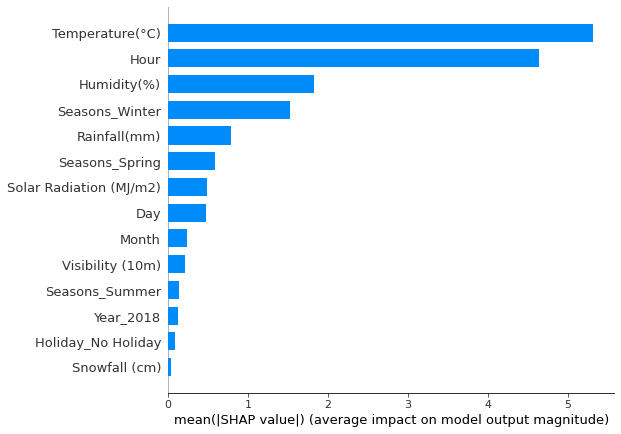

In [130]:
# Plotting a bar graph of the features according to the importance

shap.summary_plot(shap_values_rf, feature_columns, plot_type="bar")

### **Hyper-Parameter Tuning of Gradient Boosting Regressor**

In [131]:
# Initializing the Gradient Boosting Regressor Model
model_gbr = GradientBoostingRegressor(random_state = 42)

# Getting the parameters used by the Gradient Boosting Regressor Model
print('Parameters currently in use:\n')
model_gbr.get_params()

Parameters currently in use:



{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [132]:
# Giving a range to the hyperparameters for selecting best parameters from them

# Learning Rate
learning_rate = [0.1, 0.01, 1, 10]

# Maximum number of levels in tree
max_depth = range(3, 20)

# Maximum number of leaves in a tree
max_leaf_nodes = range(3, 20)

# Minimum number of samples required at each leaf node
min_samples_leaf = range(1, 10)

# Minimum number of samples required to split a node
min_samples_split = range(1, 10)

# Number of trees
n_estimators = range(100, 2000, 200)

# Create a dictionary of all the hyper-parameters
gradient_grid = {'learning_rate': learning_rate,
                'max_depth': max_depth,
                'max_leaf_nodes': max_leaf_nodes,
                'min_samples_leaf': min_samples_leaf,
                'min_samples_split': min_samples_split,
                'n_estimators': n_estimators}

In [133]:
# using Random Search CV to find the best parameters for the model
gbr_random = RandomizedSearchCV(estimator=model_gbr, param_distributions=gradient_grid, cv = 10, verbose=2, random_state=42, scoring='r2')

# Fitting the model with the training dataset
gbr_random.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END learning_rate=0.1, max_depth=11, max_leaf_nodes=17, min_samples_leaf=6, min_samples_split=1, n_estimators=1700; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, max_leaf_nodes=17, min_samples_leaf=6, min_samples_split=1, n_estimators=1700; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, max_leaf_nodes=17, min_samples_leaf=6, min_samples_split=1, n_estimators=1700; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, max_leaf_nodes=17, min_samples_leaf=6, min_samples_split=1, n_estimators=1700; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, max_leaf_nodes=17, min_samples_leaf=6, min_samples_split=1, n_estimators=1700; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, max_leaf_nodes=17, min_samples_leaf=6, min_samples_split=1, n_estimators=1700; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, max_leaf_nodes=17, min_samples_leaf=6, min_samples_spli

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=42),
                   param_distributions={'learning_rate': [0.1, 0.01, 1, 10],
                                        'max_depth': range(3, 20),
                                        'max_leaf_nodes': range(3, 20),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(1, 10),
                                        'n_estimators': range(100, 2000, 200)},
                   random_state=42, scoring='r2', verbose=2)

In [134]:
# Getting the best parameters after the Random Search Cross Validation

gbr_random.best_params_

{'learning_rate': 0.1,
 'max_depth': 12,
 'max_leaf_nodes': 19,
 'min_samples_leaf': 5,
 'min_samples_split': 9,
 'n_estimators': 1500}

In [135]:
# Storing the best parameters in a variables
gbr_best_parameters = gbr_random.best_params_

# Using the best parameters to train the model
gbr_model = GradientBoostingRegressor(learning_rate = gbr_best_parameters['learning_rate'],
                                      max_depth = gbr_best_parameters['max_depth'],
                                      max_leaf_nodes = gbr_best_parameters['max_leaf_nodes'],
                                      min_samples_leaf = gbr_best_parameters['min_samples_leaf'],
                                      min_samples_split = gbr_best_parameters['min_samples_split'],
                                      n_estimators = gbr_best_parameters['n_estimators'])

# Fitting the training data using the best parameters of the model
gbr_model.fit(X_train, Y_train)

GradientBoostingRegressor(max_depth=12, max_leaf_nodes=19, min_samples_leaf=5,
                          min_samples_split=9, n_estimators=1500)

In [136]:
# Getting the training predictions
gbr_train_preds = gbr_model.predict(X_train)

#Getting the testing predictions
gbr_test_preds = gbr_model.predict(X_test)

In [137]:
# Displaying all the evaluation metrics for the Gradient Boosting Regressor Algorithm

print_evaluation_metrics(Y_train, gbr_train_preds, Y_test, gbr_test_preds)

Training Mean Squared Error is 0.5125915240391778
Testing Mean Squared Error is 12.496607295336117

Training Root Mean Squared Error is 0.7159549734719202
Testing Root Mean Squared Error is 3.535054072476985

Training R2 Score is 0.9963417283550094
Testing R2 Score is 0.9122621507579797

Training Mean Absolute Error is 0.49164645969877707
Testing Mean Absolute Error is 2.4483797279513584

Training Mean Absolute Percentage Error is 2.7641351718111076
Testing Mean Absolute Percentage Error is 14.324152934992687

Training Adjusted R2 Score is 0.996334148689029
Testing Adjusted R2 Score is 0.9115301305616815



In [138]:
# Getting the Random Forest Regressor Model Interpretability using shap

explainer_gbr = shap.TreeExplainer(gbr_model)
shap_values_gbr = explainer_gbr.shap_values(X_test)

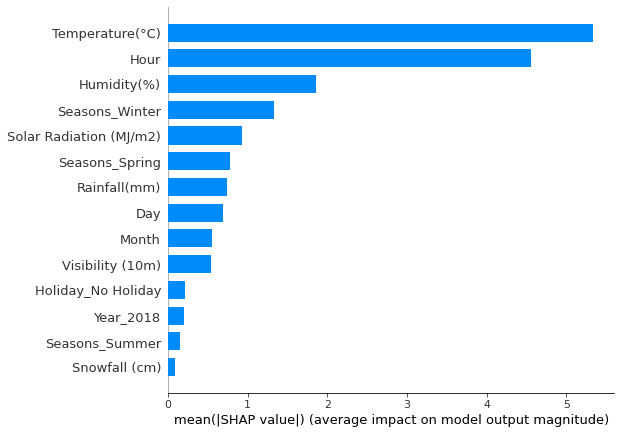

In [139]:
# Plotting a bar graph of the features according to the importance

shap.summary_plot(shap_values_gbr, feature_columns, plot_type="bar")

### **Hyper-Parameter Tuning of XGB Regressor:**

In [140]:
# Initializing the XG Boost Regressor Model
model_xgb = XGBRegressor(random_state = 42)

# Getting the parameters used by the XG Boost Regressor Model
print('Parameters currently in use:\n')
model_xgb.get_params()

Parameters currently in use:



{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [141]:
# Giving a range to the hyperparameters for selecting best parameters from them

# Minimum loss reduction required to make a split
gamma = range(0,5)

# Learning Rate
learning_rate = [0.1, 0.01, 1, 10]

# Consideration of each tree’s weight estimation
max_delta_step = range(0, 10)

# Maximum number of levels in tree
max_depth = range(3, 20)

# Minimum sum of weights of all observations required in a child.
min_child_weight = range(0,10)

# Number of trees
n_estimators = range(100, 2000, 200)

# L1 regularization term on weights
reg_alpha = range(0, 200, 20)

# L2 regularization term on weights
reg_lambda = range(1,5)

# Storing the hyperparameters in a dictionary
xgboost_grid = {'gamma': gamma,
                'learning_rate': learning_rate,
                'max_delta_step': max_delta_step,
                'max_depth': max_depth,
                'min_child_weight': min_child_weight,
                'n_estimators': n_estimators,
                'reg_alpha': reg_alpha,
                'reg_lambda': reg_lambda}

In [142]:
# Using Random Search CV to find the best parameters for the model
xgb_random = RandomizedSearchCV(estimator=model_xgb, param_distributions=xgboost_grid, cv = 10, verbose=2, random_state=42, scoring='r2')

# Fitting the model with the training dataset
xgb_random.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[13:22:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=2, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=8, n_estimators=900, reg_alpha=140, reg_lambda=1; total time=   7.8s
[13:22:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=2, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=8, n_estimators=900, reg_alpha=140, reg_lambda=1; total time=   7.8s
[13:22:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=2, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=8, n_estimators=900, reg_alpha=140, reg_lambda=1; total time=   7.7s
[13:22:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now de

RandomizedSearchCV(cv=10, estimator=XGBRegressor(random_state=42),
                   param_distributions={'gamma': range(0, 5),
                                        'learning_rate': [0.1, 0.01, 1, 10],
                                        'max_delta_step': range(0, 10),
                                        'max_depth': range(3, 20),
                                        'min_child_weight': range(0, 10),
                                        'n_estimators': range(100, 2000, 200),
                                        'reg_alpha': range(0, 200, 20),
                                        'reg_lambda': range(1, 5)},
                   random_state=42, scoring='r2', verbose=2)

In [143]:
# Getting the best parameters after the Random Search Cross Validation

xgb_random.best_params_

{'gamma': 4,
 'learning_rate': 1,
 'max_delta_step': 2,
 'max_depth': 17,
 'min_child_weight': 3,
 'n_estimators': 1500,
 'reg_alpha': 60,
 'reg_lambda': 4}

In [144]:
# Storing the best parameters in a variables
xgb_best_parameters = xgb_random.best_params_

# Using the best parameters to train the model
xgb_model = XGBRegressor(gamma = xgb_best_parameters['gamma'],
                        learning_rate = xgb_best_parameters['learning_rate'],
                        max_delta_step = xgb_best_parameters['max_delta_step'],
                        max_depth = xgb_best_parameters['max_depth'],
                        min_child_weight = xgb_best_parameters['min_child_weight'],
                        n_estimators = xgb_best_parameters['n_estimators'],
                        reg_alpha = xgb_best_parameters['reg_alpha'],
                        reg_lambda = xgb_best_parameters['reg_lambda'])

# Fitting the training data using the best parameters of the model
xgb_model.fit(X_train, Y_train)

[13:34:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(gamma=4, learning_rate=1, max_delta_step=2, max_depth=17,
             min_child_weight=3, n_estimators=1500, reg_alpha=60, reg_lambda=4)

In [145]:
# Getting the training predictions
xgb_train_preds = xgb_model.predict(X_train)

#Getting the testing predictions
xgb_test_preds = xgb_model.predict(X_test)

In [146]:
# Displaying all the evaluation metrics for the XG Boost Regressor Algorithm

print_evaluation_metrics(Y_train, xgb_train_preds, Y_test, xgb_test_preds)

Training Mean Squared Error is 4.3332403705073945
Testing Mean Squared Error is 22.169134976929477

Training Root Mean Squared Error is 2.081643670397841
Testing Root Mean Squared Error is 4.708411088353424

Training R2 Score is 0.9690744586382509
Testing R2 Score is 0.8443519767835097

Training Mean Absolute Error is 1.4943152855154282
Testing Mean Absolute Error is 3.3322904182240145

Training Mean Absolute Percentage Error is 8.711726173772025
Testing Mean Absolute Percentage Error is 18.691208139564907

Training Adjusted R2 Score is 0.9690103832232643
Testing Adjusted R2 Score is 0.8430533639557202



In [147]:
# Getting the Random Forest Regressor Model Interpretability using shap

explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test)

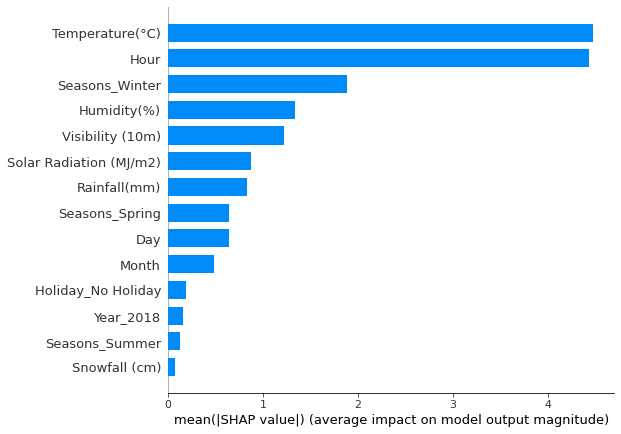

In [148]:
# Plotting a bar graph of the features according to the importance

shap.summary_plot(shap_values_xgb, feature_columns, plot_type="bar")